<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание:" data-toc-modified-id="Задание:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Задание</strong>:</a></span></li></ul></div>

# **Задание**:


Сравнить работу алгоритмов кластеризации:
* K-Means

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

* Агломеративная кластеризация

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

* DBSCAN

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN


с использованием тестовых наборов данных:    
* dataset1.csv
* dataset2.csv
* dataset3.csv
    
    

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [ ]:
# Функция для загрузки и масштабирования данных с указанием разделителя
def load_and_scale_data(filepath):
    # Попробуем использовать табуляцию как разделитель
    dataset = pd.read_csv(filepath, sep='\t')

    # Масштабирование данных
    scaler = StandardScaler()
    dataset_scaled = scaler.fit_transform(dataset)

    return dataset_scaled

In [ ]:
# Загрузка наборов данных
dataset1_scaled = load_and_scale_data('dataset1.csv')
dataset2_scaled = load_and_scale_data('dataset2.csv')
dataset3_scaled = load_and_scale_data('dataset3.csv')



Результаты для Dataset 1:
K-Means: силуэтный коэффициент = 0.53
Агломеративная кластеризация: силуэтный коэффициент = 0.52
DBSCAN: кластеризация не смогла выделить несколько кластеров.


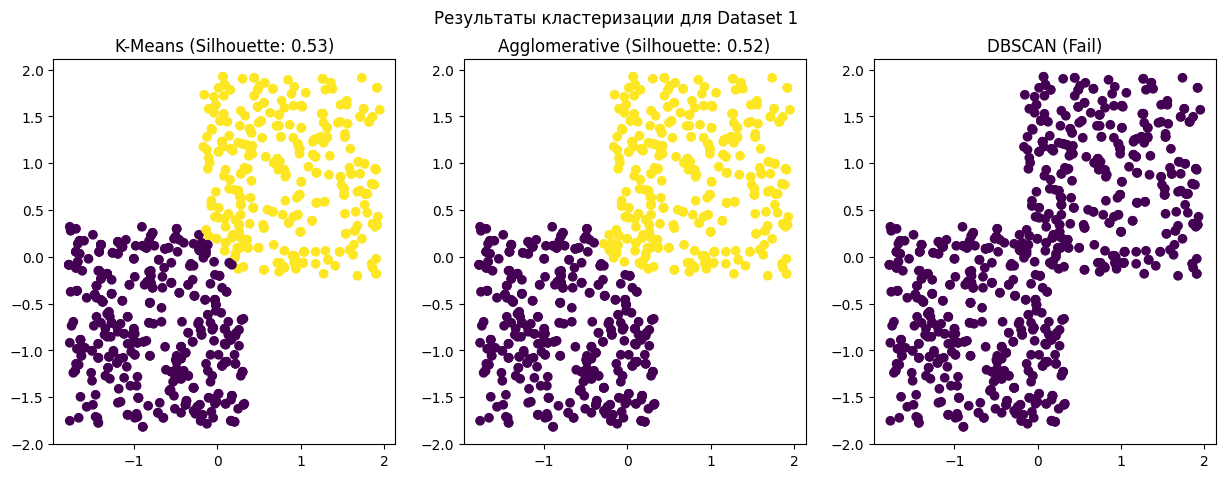


Результаты для Dataset 2:
K-Means: силуэтный коэффициент = 0.51
Агломеративная кластеризация: силуэтный коэффициент = 0.53
DBSCAN: силуэтный коэффициент = 0.71


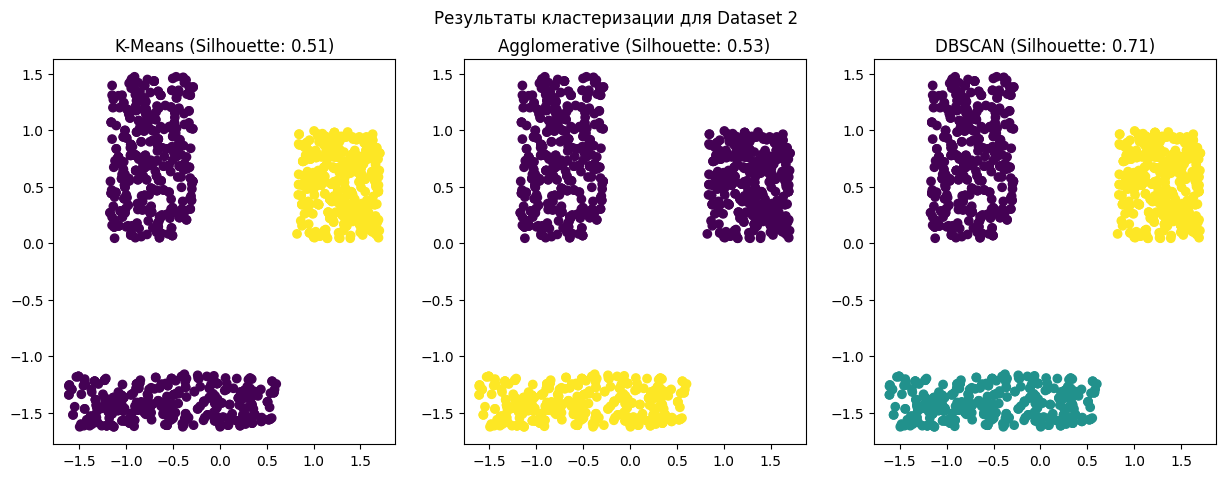


Результаты для Dataset 3:
K-Means: силуэтный коэффициент = 0.40
Агломеративная кластеризация: силуэтный коэффициент = 0.37
DBSCAN: кластеризация не смогла выделить несколько кластеров.


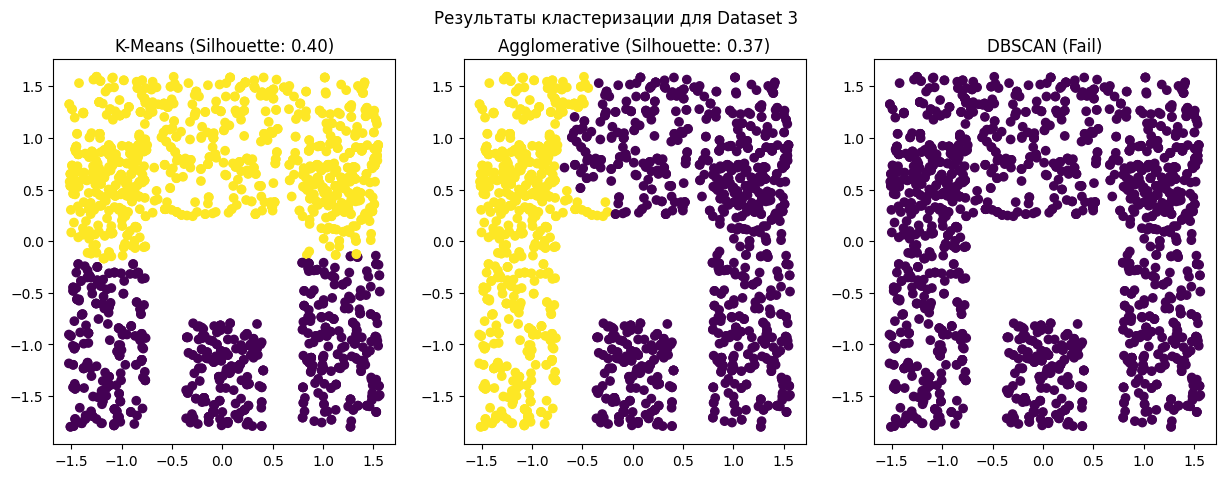

In [ ]:
# Функция для выполнения кластеризации и визуализации
def cluster_and_evaluate(dataset, dataset_name):
    print(f"\nРезультаты для {dataset_name}:")

    # K-Means
    kmeans = KMeans(n_clusters=2, random_state=42)
    y_kmeans = kmeans.fit_predict(dataset)
    score_kmeans = silhouette_score(dataset, y_kmeans)
    print(f"K-Means: силуэтный коэффициент = {score_kmeans:.2f}")

    # Агломеративная кластеризация
    agglomerative = AgglomerativeClustering(n_clusters=2)
    y_agg = agglomerative.fit_predict(dataset)
    score_agg = silhouette_score(dataset, y_agg)
    print(f"Агломеративная кластеризация: силуэтный коэффициент = {score_agg:.2f}")

    # DBSCAN
    dbscan = DBSCAN()
    y_dbscan = dbscan.fit_predict(dataset)
    if len(set(y_dbscan)) > 1:  # Проверка, есть ли более одного кластера
        score_dbscan = silhouette_score(dataset, y_dbscan)
        print(f"DBSCAN: силуэтный коэффициент = {score_dbscan:.2f}")
    else:
        print("DBSCAN: кластеризация не смогла выделить несколько кластеров.")

    # Визуализация
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].scatter(dataset[:, 0], dataset[:, 1], c=y_kmeans)
    axes[0].set_title(f"K-Means (Silhouette: {score_kmeans:.2f})")

    axes[1].scatter(dataset[:, 0], dataset[:, 1], c=y_agg)
    axes[1].set_title(f"Agglomerative (Silhouette: {score_agg:.2f})")

    axes[2].scatter(dataset[:, 0], dataset[:, 1], c=y_dbscan)
    axes[2].set_title(f"DBSCAN (Silhouette: {score_dbscan:.2f})" if len(set(y_dbscan)) > 1 else "DBSCAN (Fail)")

    plt.suptitle(f'Результаты кластеризации для {dataset_name}')
    plt.show()

# Применение к каждому набору данных
cluster_and_evaluate(dataset1_scaled, 'Dataset 1')
cluster_and_evaluate(dataset2_scaled, 'Dataset 2')
cluster_and_evaluate(dataset3_scaled, 'Dataset 3')

# Выводы по наборам данных:
- Для dataset1 K-Means немного лучше, чем агломеративная кластеризация, но оба алгоритма работают почти одинаково. DBSCAN не смог найти кластеры, возможно, из-за слишком высоких параметров шума или недостаточной плотности данных.

- Для dataset2 DBSCAN показывает наилучшие результаты с силуэтным коэффициентом 0.71, что свидетельствует о хорошей разделимости кластеров. Агломеративная кластеризация немного лучше, чем K-Means.

- Для dataset3 все алгоритмы показывают низкие результаты, но K-Means немного лучше, чем агломеративная кластеризация. DBSCAN снова не смог выделить кластеры.

# Общие выводы:
- K-Means и агломеративная кластеризация показывают близкие результаты по силуэтным коэффициентам, что говорит о сравнительно неплохой разделимости кластеров.
- DBSCAN хорошо работает на Dataset 2, но не удаётся выделить кластеры на других наборах. Это может указывать на то, что в этих наборах данных кластеры менее плотные или имеют слишком высокую степень разброса, что не позволяет DBSCAN корректно их идентифицировать.

## Рекомендуемое решение:
В зависимости от конкретного набора данных, возможно, стоит применять несколько алгоритмов и анализировать результаты в контексте данных. Для Dataset 2 DBSCAN кажется наиболее эффективным, тогда как для остальных наборов лучше работает K-Means.

# Кластеризация qRS комплексов в ЭКГ

## Общий вид цикла

<img src="./SinusRhythmLabels.png">

## Экстрасистола тип 1

<img src="./vebs.jpg">

## Экстрасистола тип 2

<img src="./Ventricular-extrasystole-ECG.jpg">

# Задание

Используя алгоритмы кластеризации разделить qRS комплесы ЭКГ на группы, схожие по форме.
Данные представлены в файлах:
* ecg1_samples.csv
* ecg2_samples.csv

In [1]:
pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import DBSCAN
import wfdb
%matplotlib inline

In [13]:
X = np.loadtxt('./ecg2_samples.csv')
Y = np.loadtxt('./ecg1_samples.csv')

In [16]:
X.shape


(3037, 140)

In [17]:
Y.shape

(2420, 140)

In [5]:
colors = {
    0: 'green',
    1: 'red',
    2: 'blue'
}

In [6]:
kmeans = MiniBatchKMeans(init='random', n_clusters=4, random_state=0).fit(X)

In [18]:
kmeans = MiniBatchKMeans(init='random', n_clusters=4, random_state=0).fit(Y)

In [7]:
labels = kmeans.predict(X)

In [19]:
labels = kmeans.predict(Y)

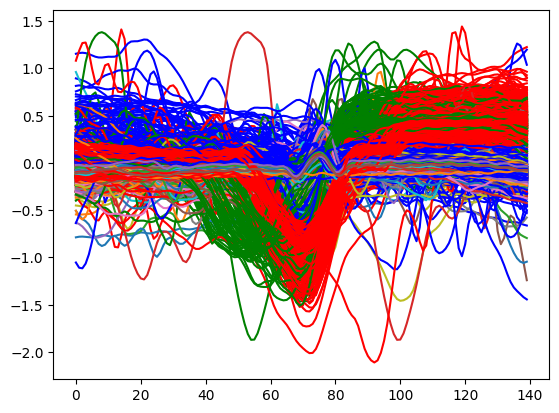

In [11]:
# for j in labels:
for i in range(X.shape[0]):
    color = colors.get(labels[i])
    plt.plot(X[i], color=color)
plt.show()

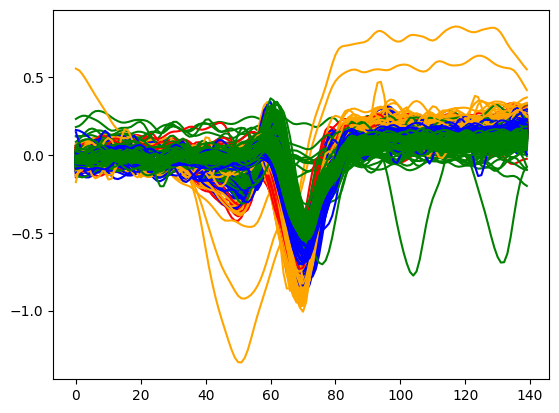

In [20]:
# for j in labels:
for i in range(Y.shape[0]):
    color = colors.get(labels[i])
    plt.plot(Y[i], color=color)
plt.show()

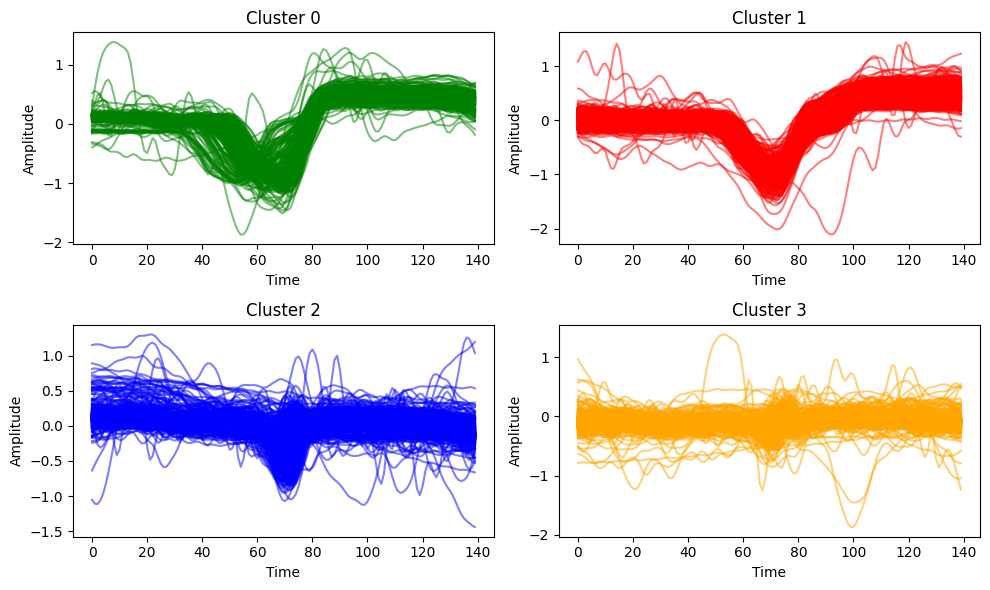

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Загрузка данных
X = np.loadtxt('./ecg2_samples.csv')

# Определение цветов для кластеров
colors = {
    0: 'green',
    1: 'red',
    2: 'blue',
    3: 'orange'  # Добавляем цвет для четвёртого кластера
}

# Кластеризация с использованием MiniBatchKMeans
kmeans = MiniBatchKMeans(init='random', n_clusters=4, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)

# Визуализация кластеров
plt.figure(figsize=(10, 6))

# Создаём отдельные графики для каждого кластера
for cluster in range(4):
    plt.subplot(2, 2, cluster + 1)  # 2x2 сетка для графиков
    for i in range(X.shape[0]):
        if labels[i] == cluster:
            plt.plot(X[i], color=colors[cluster], alpha=0.5)  # Параметр alpha для полупрозрачности
    plt.title(f'Cluster {cluster}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

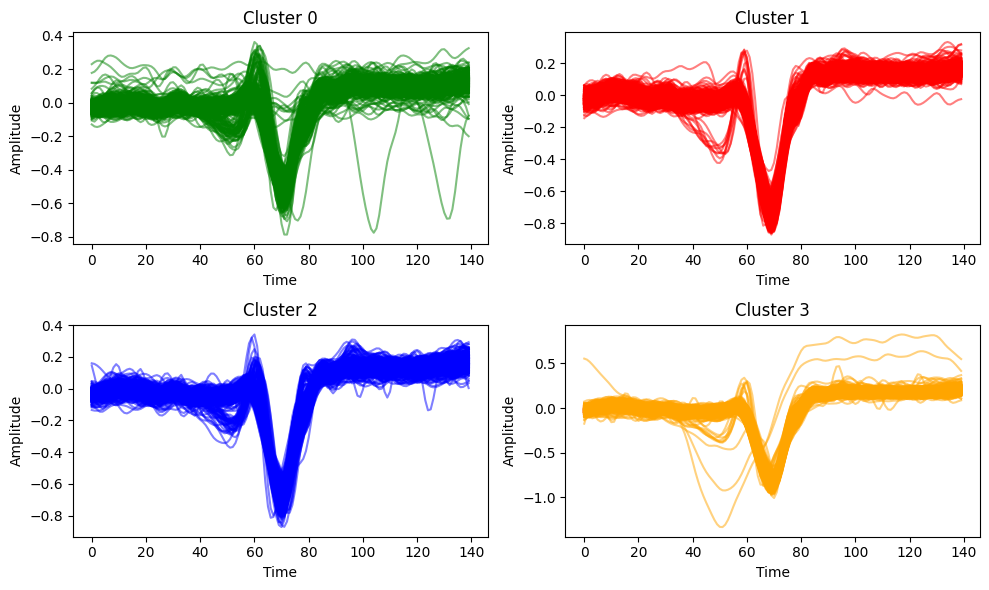

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Загрузка данных
X = np.loadtxt('./ecg1_samples.csv')

# Определение цветов для кластеров
colors = {
    0: 'green',
    1: 'red',
    2: 'blue',
    3: 'orange'  # Добавляем цвет для четвёртого кластера
}

# Кластеризация с использованием MiniBatchKMeans
kmeans = MiniBatchKMeans(init='random', n_clusters=4, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)

# Визуализация кластеров
plt.figure(figsize=(10, 6))

# Создаём отдельные графики для каждого кластера
for cluster in range(4):
    plt.subplot(2, 2, cluster + 1)  # 2x2 сетка для графиков
    for i in range(X.shape[0]):
        if labels[i] == cluster:
            plt.plot(X[i], color=colors[cluster], alpha=0.5)  # Параметр alpha для полупрозрачности
    plt.title(f'Cluster {cluster}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [32]:
samples1 = np.loadtxt('./ecg2_samples.csv')
samples2 = np.loadtxt('./ecg1_samples.csv')

In [33]:
db1 = DBSCAN(eps=0.3, min_samples=10).fit(samples1)
db1 = DBSCAN(eps=0.3, min_samples=10).fit(samples2)

In [34]:
km = MiniBatchKMeans(n_clusters=3, init='k-means++', n_init=1,
                     init_size=1000, batch_size=1000, verbose=True)

In [35]:
km.fit(samples1)
km.fit(samples2)

Init 1/1 with method k-means++
Inertia for init 1/1: 4036.973249260898
Minibatch step 1/303: mean batch inertia: 3.7083269940506023
Minibatch step 2/303: mean batch inertia: 2.842157962597368, ewa inertia: 2.842157962597368
Minibatch step 3/303: mean batch inertia: 2.7116573497858676, ewa inertia: 2.756245775098026
Minibatch step 4/303: mean batch inertia: 2.7577548064615627, ewa inertia: 2.757239212467043
Minibatch step 5/303: mean batch inertia: 2.9396912399139064, ewa inertia: 2.877352462925807
Minibatch step 6/303: mean batch inertia: 2.771548068246422, ewa inertia: 2.80769848354504
Minibatch step 7/303: mean batch inertia: 2.4956770481576993, ewa inertia: 2.6022860836850397
Minibatch step 8/303: mean batch inertia: 2.6134248581746657, ewa inertia: 2.6096190491159983
Minibatch step 9/303: mean batch inertia: 2.495028078720582, ewa inertia: 2.53418062225924
Minibatch step 10/303: mean batch inertia: 2.520900478786066, ewa inertia: 2.525437933995136
Minibatch step 11/303: mean batch 

MiniBatchKMeans(batch_size=1000, init_size=1000, n_clusters=3, n_init=1,
                verbose=True)

In [37]:
labels1 = km.predict(samples1)
# labels = db.labels_
labels2 = km.predict(samples2)
# labels = db.labels_

In [40]:
np.unique(labels1)


array([0, 1, 2], dtype=int32)

In [41]:
np.unique(labels2)

array([0, 1, 2], dtype=int32)

In [42]:
import random

def colors(n):
    ret = []
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    step = 256 / n
    for i in range(n):
        r += step
        g += step
        b += step
        r = int(r) % 256
        g = int(g) % 256
        b = int(b) % 256
        ret.append([r,g,b])
    return np.array(ret)/255.0

In [43]:
cols = colors(n=3)

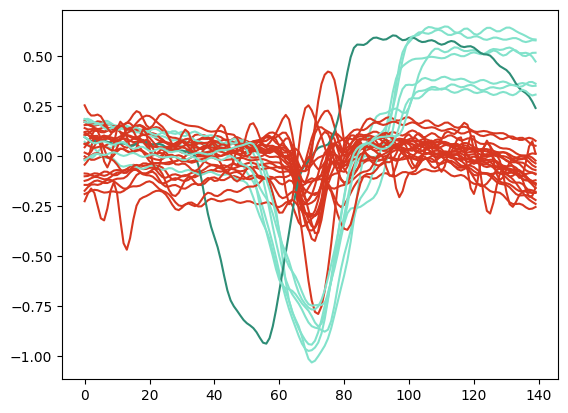

In [45]:
for i in range(0,samples1.shape[0],100):
    plt.plot(samples1[i], c=cols[labels1[i]])

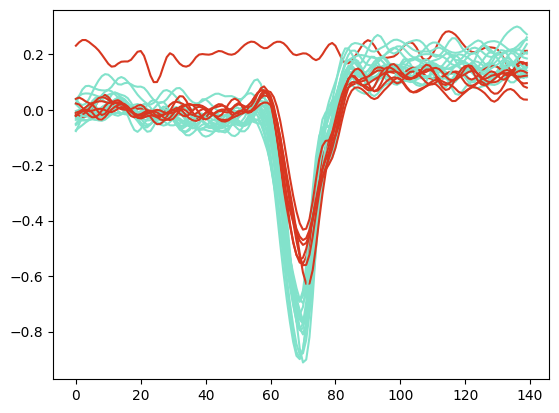

In [46]:
for i in range(0,samples2.shape[0],100):
    plt.plot(samples2[i], c=cols[labels2[i]])

In [47]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [62]:
record_name = 'vebs.jpg' # Поддерживает только формат .hea

In [ ]:
record = wfdb.rdrecord(record_name)

In [ ]:
signal = record.p_signal[:,1]

In [ ]:
clear_signal = butter_bandpass_filter(signal, lowcut, highcut, fs, order=3)

In [ ]:
annotation = wfdb.rdann(record_name, 'atr')

In [ ]:
preaks = annotation.sample

In [ ]:
symbols = annotation.symbol

In [ ]:
plt.plot(samples1[10])

In [ ]:
window_size = 70
samples1 = []
for idx in range(len(symbols)):
    begin_idx = preaks[idx] - window_size
    end_idx = preaks[idx] + window_size
    if begin_idx > 0 and end_idx < len(signal):
        sample = clear_signal[begin_idx:end_idx]
        samples1.append(sample)
samples = np.array(samples1)

In [ ]:
plt.plot(samples[1000])

In [66]:
np.savetxt('ecg2_samples.csv', samples, delimiter='\t', fmt='%10.5f')   # X is an array

In [64]:
!head ./ecg1_samples.csv

   0.23081	   0.24298	   0.25117	   0.25127	   0.24452	   0.23517	   0.22555	   0.21374	   0.19849	   0.18161	   0.16539	   0.15521	   0.15699	   0.16627	   0.17294	   0.17390	   0.17385	   0.17994	   0.19409	   0.20879	   0.21168	   0.19454	   0.16040	   0.12301	   0.09936	   0.09964	   0.12225	   0.15724	   0.18936	   0.20354	   0.19695	   0.18045	   0.16595	   0.15770	   0.15522	   0.15960	   0.17258	   0.18882	   0.19878	   0.20062	   0.19920	   0.19841	   0.20081	   0.20681	   0.21162	   0.21032	   0.20482	   0.19997	   0.19821	   0.20145	   0.21056	   0.22270	   0.23349	   0.24111	   0.24543	   0.24415	   0.23650	   0.22723	   0.22144	   0.22279	   0.23133	   0.24043	   0.24499	   0.24491	   0.23958	   0.22829	   0.21295	   0.20014	   0.19666	   0.19998	   0.20314	   0.20246	   0.19578	   0.18492	   0.17850	   0.18388	   0.19948	   0.21840	   0.23441	   0.24064	   0.23062	   0.20718	   0.18251	   0.16796	   0.16733	   0.17662	   0.19121	   0.20900	   0.22738	   0.24296	   0.25069

In [65]:
!head ./ecg2_samples.csv

  -0.02211	  -0.01470	  -0.01266	  -0.00237	   0.01865	   0.03789	   0.04515	   0.04290	   0.04017	   0.04406	   0.05486	   0.06614	   0.06975	   0.06289	   0.05299	   0.05115	   0.05937	   0.06783	   0.06547	   0.05264	   0.04143	   0.04219	   0.05184	   0.05787	   0.05233	   0.03965	   0.03152	   0.03520	   0.04656	   0.05444	   0.05066	   0.03749	   0.02713	   0.02912	   0.03856	   0.04224	   0.03383	   0.01824	   0.00574	   0.00486	   0.01644	   0.03041	   0.03238	   0.01919	   0.00369	  -0.00256	  -0.00352	  -0.01032	  -0.02859	  -0.05541	  -0.08262	  -0.10590	  -0.13052	  -0.16422	  -0.20958	  -0.26380	  -0.32122	  -0.37916	  -0.44052	  -0.50844	  -0.58045	  -0.64978	  -0.71196	  -0.76612	  -0.81335	  -0.85762	  -0.90113	  -0.93943	  -0.96549	  -0.97578	  -0.97219	  -0.95893	  -0.93431	  -0.88920	  -0.81699	  -0.72075	  -0.61220	  -0.50375	  -0.39938	  -0.29749	  -0.20028	  -0.11555	  -0.05278	  -0.01664	  -0.00297	  -0.00173	  -0.00260	  -0.00190	  -0.00322	  -0.00640	  -0.00278